#Library and Dataset

In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [539]:
attrition_url = 'https://docs.google.com/spreadsheets/d/1L5C3_4fXkwbTBBpvi9vB8BpbxeFH4D3YEOWaefRUNII/edit#gid=281350685'
attrition = attrition_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(attrition)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#Data Cleansing

##HR Employee Attrition Dataset

###Irrelevant Columns

In [541]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [542]:
for column in df.columns:
  print (f'{column}: Number of unique values {df[column].nunique()}')
  print ('\n')

Age: Number of unique values 43


Attrition: Number of unique values 2


BusinessTravel: Number of unique values 3


DailyRate: Number of unique values 886


Department: Number of unique values 3


DistanceFromHome: Number of unique values 29


Education: Number of unique values 5


EducationField: Number of unique values 6


EmployeeCount: Number of unique values 1


EmployeeNumber: Number of unique values 1470


EnvironmentSatisfaction: Number of unique values 4


Gender: Number of unique values 2


HourlyRate: Number of unique values 71


JobInvolvement: Number of unique values 4


JobLevel: Number of unique values 5


JobRole: Number of unique values 9


JobSatisfaction: Number of unique values 4


MaritalStatus: Number of unique values 3


MonthlyIncome: Number of unique values 1349


MonthlyRate: Number of unique values 1427


NumCompaniesWorked: Number of unique values 10


Over18: Number of unique values 1


OverTime: Number of unique values 2


PercentSalaryHike: Number of uni

Kita menghilangkan kolom karena hanya memiliki 1 hasil unik:

EmployeeCount = Jumlah karyawan = 1, tidak < > 1.

Over18 = Semua karyawan yang bekerja diatas umur 18.

StandardHours = Semua karyawan memiliki standar jam kerja yang sama yaitu 80.

In [543]:
df = df.copy()
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

###Data Types

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

###Duplicate

In [545]:
df[df.duplicated(keep=False)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [546]:
df[df['EmployeeNumber'].duplicated(keep=False)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Tidak ada baris yang duplikat dari semua kolom atau nomor karyawan.

###Null

In [547]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Tidak ada data null/kosong didataset.

###Typos

In [548]:
object_col = []
for column in df.columns:
    if df[column].dtype == object:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("\n")
object_col

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64


BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64


JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Directo

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

Typos di BusinessTravel:

Travel_Rarely = Rarely

Travel_Frequently = Frequently

Non-Travel

In [549]:
typos_businesstravel = ['Travel_Rarely', 'Travel_Frequently']
df[df.isin(typos_businesstravel).any(axis=1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [550]:
typos_businesstravel = ['Travel_Rarely', 'Travel_Frequently']
df = df.copy()
df.replace(to_replace=typos_businesstravel, value=['Rarely','Frequently'], inplace=True)
df['BusinessTravel'].value_counts()

Rarely        1043
Frequently     277
Non-Travel     150
Name: BusinessTravel, dtype: int64

###Outliers

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [552]:
outlier_suspect_col = []
for column in df.columns:
    if df[column].dtype == int:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("\n")
outlier_suspect_col

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541 

[]

Dari hasil diatas kolom yang dicurigakan memiliki outlier adalah:

1.   Daily Rate
2.   Hourly Rate
3.   Monthly Income
4.   Monthly Rate


In [553]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [554]:
df[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']]

,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate
0,1102,94,5993,19479
1,279,61,5130,24907
2,1373,92,2090,2396
3,1392,56,2909,23159
4,591,40,3468,16632
...,...,...,...,...
1465,884,41,2571,12290
1466,613,42,9991,21457
1467,155,87,6142,5174
1468,1023,63,5390,13243


<AxesSubplot:>

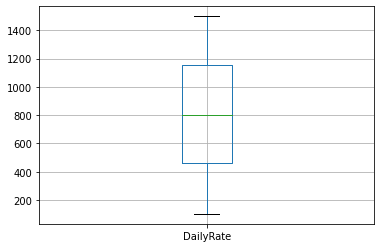

In [555]:
df.boxplot(column=['DailyRate'])

<AxesSubplot:>

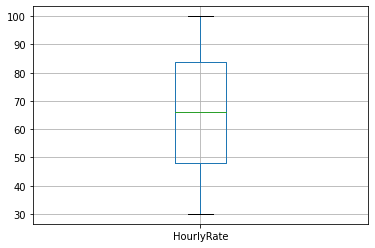

In [556]:
df.boxplot(column=['HourlyRate'])

<AxesSubplot:>

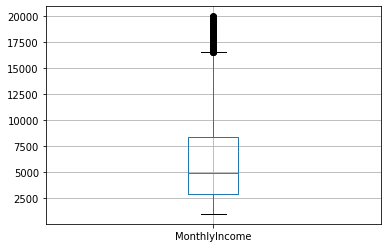

In [557]:
df.boxplot(column=['MonthlyIncome'])

<AxesSubplot:>

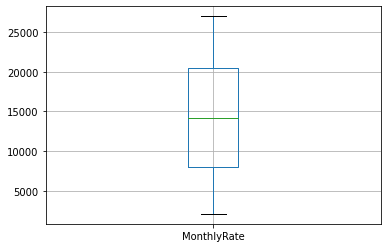

In [558]:
df.boxplot(column=['MonthlyRate'])

In [559]:
#MonthlyIncome Outliers
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5*IQR
boxplat_max = Q3 + 1.5*IQR
print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR = ', IQR)
print('boxplot_min = ', boxplot_min)
print('boxplot_max = ', boxplat_max)

Q1 =  2911.0
Q3 =  8379.0
IQR =  5468.0
boxplot_min =  -5291.0
boxplot_max =  16581.0


In [560]:
pd.set_option('display.max_rows', None)
df[df['MonthlyIncome'] > 16581][['JobRole', 'JobLevel']]

,JobRole,JobLevel
25,Manager,5
29,Manager,5
45,Research Director,5
62,Research Director,5
105,Manager,5
106,Research Director,5
112,Manager,4
119,Manager,4
123,Research Director,5
147,Manager,4


###Cleaned Data

In [561]:
df.to_csv('Cleaned_Attrition')

#EDA

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

##Numerical

In [563]:
pd.reset_option('display.max_rows')
numerics = ['int64']
df_numerics = df.select_dtypes(include=numerics)
df_numerics

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2064,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,2065,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


In [564]:
df_numerics.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [565]:
df_attrition_yes = df.loc[df['Attrition'] == 'Yes']
df_attrition_yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Rarely,103,Research & Development,24,3,Life Sciences,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Yes,14,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Rarely,1218,Sales,9,4,Life Sciences,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,No,23,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Rarely,699,Research & Development,6,1,Medical,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,No,11,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Frequently,638,Sales,9,3,Marketing,2023,4,Male,33,3,1,Sales Representative,1,Married,1790,26956,1,No,19,3,1,1,1,3,2,1,0,1,0
1442,29,Yes,Rarely,1092,Research & Development,1,4,Medical,2027,1,Male,36,3,1,Research Scientist,4,Married,4787,26124,9,Yes,14,3,2,3,4,3,4,2,2,2,2
1444,56,Yes,Rarely,310,Research & Development,7,2,Technical Degree,2032,4,Male,72,3,1,Laboratory Technician,3,Married,2339,3666,8,No,11,3,4,1,14,4,1,10,9,9,8
1452,50,Yes,Frequently,878,Sales,1,4,Life Sciences,2044,2,Male,94,3,2,Sales Executive,3,Divorced,6728,14255,7,No,12,3,4,2,12,3,3,6,3,0,1


In [566]:
df_attrition_no = df.loc[df['Attrition'] == 'No']
df_attrition_no

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
3,33,No,Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Frequently,1005,Research & Development,2,2,Life Sciences,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,No,Rarely,1324,Research & Development,3,3,Medical,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


###Age

Text(0, 0.5, 'Number of people')

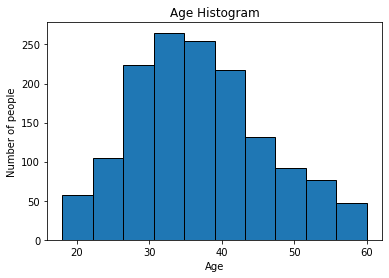

In [567]:
plt.hist(df['Age'], edgecolor='Black')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')

Distribusi data umur terlihat normal (bell curve).

In [568]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

Rata-rata umur dalam data adalah 37. Atau antara 28 - 46

Text(0, 0.5, 'Number of people attrition')

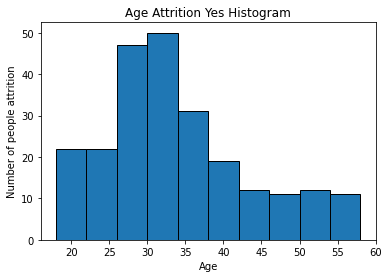

In [569]:
plt.hist(df_attrition_yes['Age'], edgecolor='Black')
plt.title('Age Attrition Yes Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people attrition')

In [570]:
df_attrition_yes['Age'].describe()

count    237.000000
mean      33.607595
std        9.689350
min       18.000000
25%       28.000000
50%       32.000000
75%       39.000000
max       58.000000
Name: Age, dtype: float64

Umur rata-rata karyawan yang mengalami Attrition adalah 34. Atau diantara 24 - 44 tahun.

Text(0, 0.5, 'Number of people')

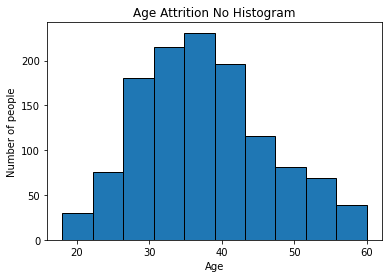

In [571]:
plt.hist(df_attrition_no['Age'], edgecolor='Black')
plt.title('Age Attrition No Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')

In [572]:
df_attrition_no['Age'].describe()

count    1233.000000
mean       37.561233
std         8.888360
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

Umur yang tidak mengalami Attrition memiliki rata-rata 38.

###Daily Rate

Text(0, 0.5, 'Number of times')

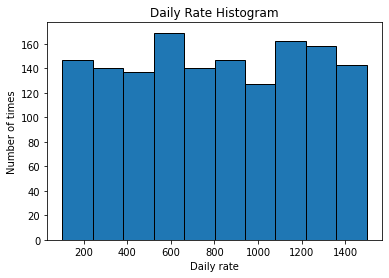

In [573]:
plt.hist(df['DailyRate'], edgecolor='Black')
plt.title('Daily Rate Histogram')
plt.xlabel('Daily rate')
plt.ylabel('Number of times')

In [574]:
df['DailyRate'].describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

Rata-rata dailyrate adalah 802. Atau antara 399 - 1.205.

Text(0, 0.5, 'Number of times')

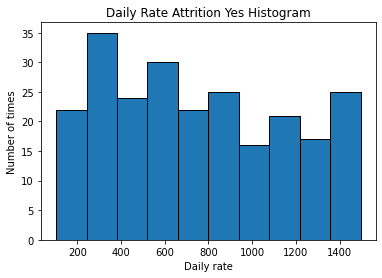

In [575]:
plt.hist(df_attrition_yes['DailyRate'], edgecolor='Black')
plt.title('Daily Rate Attrition Yes Histogram')
plt.xlabel('Daily rate')
plt.ylabel('Number of times')

In [576]:
df_attrition_yes['DailyRate'].describe()

count     237.000000
mean      750.362869
std       401.899519
min       103.000000
25%       408.000000
50%       699.000000
75%      1092.000000
max      1496.000000
Name: DailyRate, dtype: float64

Text(0, 0.5, 'Number of times')

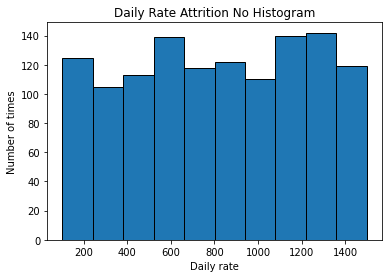

In [577]:
plt.hist(df_attrition_no['DailyRate'], edgecolor='Black')
plt.title('Daily Rate Attrition No Histogram')
plt.xlabel('Daily rate')
plt.ylabel('Number of times')

In [578]:
df_attrition_no['DailyRate'].describe()

count    1233.000000
mean      812.504461
std       403.208379
min       102.000000
25%       477.000000
50%       817.000000
75%      1176.000000
max      1499.000000
Name: DailyRate, dtype: float64

###Distance From Home

Text(0, 0.5, 'Number of people')

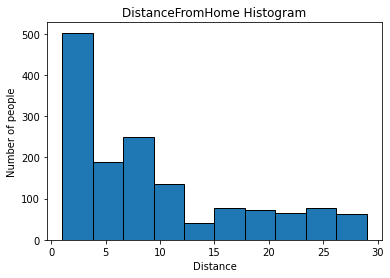

In [579]:
plt.hist(df['DistanceFromHome'], edgecolor='Black')
plt.title('DistanceFromHome Histogram')
plt.xlabel('Distance')
plt.ylabel('Number of people')

Distribusi data untuk jarak dari rumah mengalami skewness (positive).

In [580]:
df['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

Rata-rata jarak bekerja dari rumah adalah 9.

Text(0, 0.5, 'Number of people')

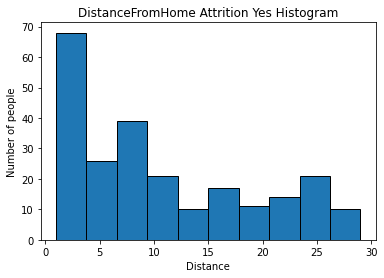

In [581]:
plt.hist(df_attrition_yes['DistanceFromHome'], edgecolor='Black')
plt.title('DistanceFromHome Attrition Yes Histogram')
plt.xlabel('Distance')
plt.ylabel('Number of people')

In [582]:
df_attrition_yes['DistanceFromHome'].describe()

count    237.000000
mean      10.632911
std        8.452525
min        1.000000
25%        3.000000
50%        9.000000
75%       17.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

Text(0, 0.5, 'Number of people')

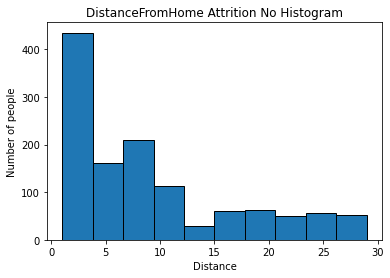

In [583]:
plt.hist(df_attrition_no['DistanceFromHome'], edgecolor='Black')
plt.title('DistanceFromHome Attrition No Histogram')
plt.xlabel('Distance')
plt.ylabel('Number of people')

In [584]:
df_attrition_no['DistanceFromHome'].describe()

count    1233.000000
mean        8.915653
std         8.012633
min         1.000000
25%         2.000000
50%         7.000000
75%        13.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

###Education

Text(0, 0.5, 'Number of people')

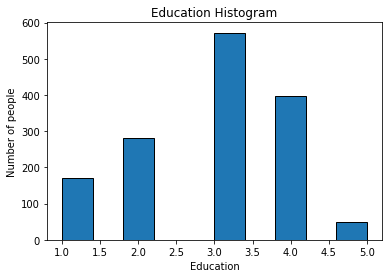

In [585]:
plt.hist(df['Education'], edgecolor='Black')
plt.title('Education Histogram')
plt.xlabel('Education')
plt.ylabel('Number of people')

In [586]:
df['Education'].mode()

0    3
Name: Education, dtype: int64

Text(0, 0.5, 'Number of people')

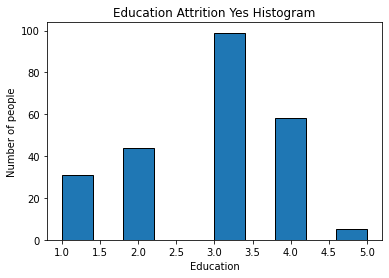

In [587]:
plt.hist(df_attrition_yes['Education'], edgecolor='Black')
plt.title('Education Attrition Yes Histogram')
plt.xlabel('Education')
plt.ylabel('Number of people')

In [588]:
df_attrition_yes['Education'].mode()

0    3
Name: Education, dtype: int64

Text(0, 0.5, 'Number of people')

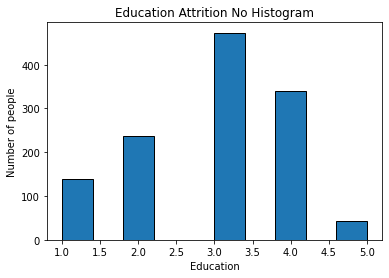

In [589]:
plt.hist(df_attrition_no['Education'], edgecolor='Black')
plt.title('Education Attrition No Histogram')
plt.xlabel('Education')
plt.ylabel('Number of people')

In [590]:
df_attrition_no['Education'].mode()

0    3
Name: Education, dtype: int64

###Environment Satisfaction

Text(0, 0.5, 'Number of satsifaction')

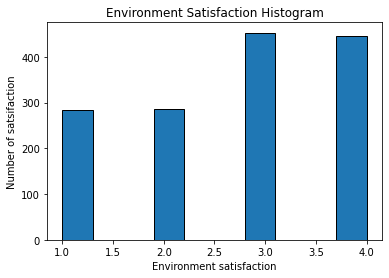

In [591]:
plt.hist(df['EnvironmentSatisfaction'], edgecolor='Black')
plt.title('Environment Satisfaction Histogram')
plt.xlabel('Environment satisfaction')
plt.ylabel('Number of satsifaction')

In [592]:
df['EnvironmentSatisfaction'].mode()

0    3
Name: EnvironmentSatisfaction, dtype: int64

Mode kepuasan terhadap lingkungan adalah 3.

Text(0, 0.5, 'Number of people satisfaction attrition')

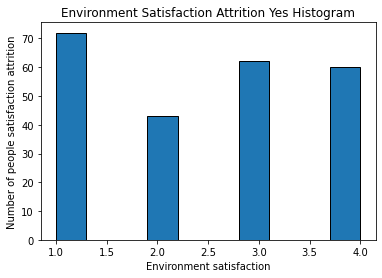

In [593]:
plt.hist(df_attrition_yes['EnvironmentSatisfaction'], edgecolor='Black')
plt.title('Environment Satisfaction Attrition Yes Histogram')
plt.xlabel('Environment satisfaction')
plt.ylabel('Number of people satisfaction attrition')

In [594]:
df_attrition_yes['EnvironmentSatisfaction'].mode()

0    1
Name: EnvironmentSatisfaction, dtype: int64

Rata-rata karyawan yang menilai 1 dalam hal kepuasan lingkungan mengalami Attrition.

Text(0, 0.5, 'Number of people satisfaction attrition')

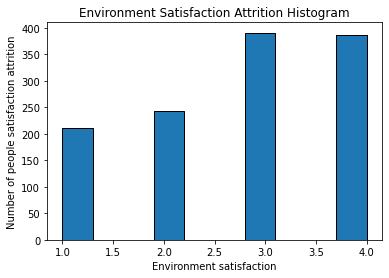

In [595]:
plt.hist(df_attrition_no['EnvironmentSatisfaction'], edgecolor='Black')
plt.title('Environment Satisfaction Attrition Histogram')
plt.xlabel('Environment satisfaction')
plt.ylabel('Number of people satisfaction attrition')

In [596]:
df_attrition_no['EnvironmentSatisfaction'].mode()

0    3
Name: EnvironmentSatisfaction, dtype: int64

Rata-rata yang tidak mengalami Attrition menilai 3 - 4 untuk kepuasan terhadap lingkungan.

###Hourly Rate

Text(0, 0.5, 'Number of times')

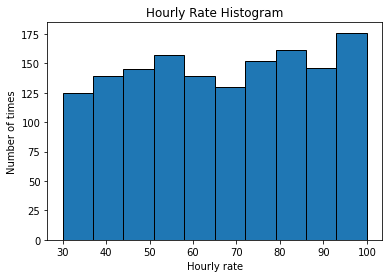

In [597]:
plt.hist(df['HourlyRate'], edgecolor='Black')
plt.title('Hourly Rate Histogram')
plt.xlabel('Hourly rate')
plt.ylabel('Number of times')

In [598]:
df['HourlyRate'].describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

Text(0, 0.5, 'Number of times')

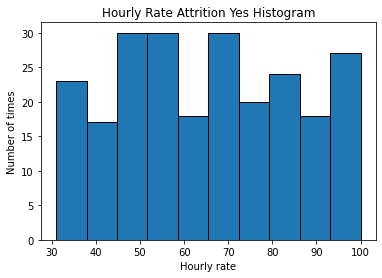

In [599]:
plt.hist(df_attrition_yes['HourlyRate'], edgecolor='Black')
plt.title('Hourly Rate Attrition Yes Histogram')
plt.xlabel('Hourly rate')
plt.ylabel('Number of times')

In [600]:
df_attrition_yes['HourlyRate'].describe()

count    237.000000
mean      65.573840
std       20.099958
min       31.000000
25%       50.000000
50%       66.000000
75%       84.000000
max      100.000000
Name: HourlyRate, dtype: float64

Text(0, 0.5, 'Number of times')

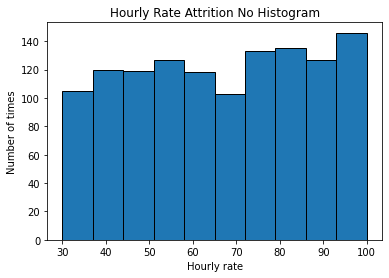

In [601]:
plt.hist(df_attrition_no['HourlyRate'], edgecolor='Black')
plt.title('Hourly Rate Attrition No Histogram')
plt.xlabel('Hourly rate')
plt.ylabel('Number of times')

In [602]:
df_attrition_no['HourlyRate'].describe()

count    1233.000000
mean       65.952149
std        20.380754
min        30.000000
25%        48.000000
50%        66.000000
75%        83.000000
max       100.000000
Name: HourlyRate, dtype: float64

Tidak ada perbedaan hourly rate antara yang mengalami attrition (yes/no).

###Job Involvement

Text(0, 0.5, 'Number of times')

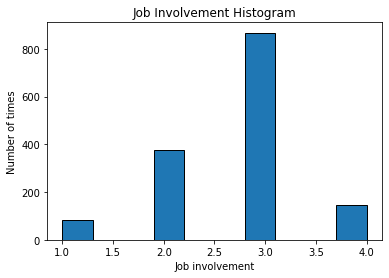

In [603]:
plt.hist(df['JobInvolvement'], edgecolor='Black')
plt.title('Job Involvement Histogram')
plt.xlabel('Job involvement')
plt.ylabel('Number of times')

In [604]:
df['JobInvolvement'].mode()

0    3
Name: JobInvolvement, dtype: int64

Text(0, 0.5, 'Number of times')

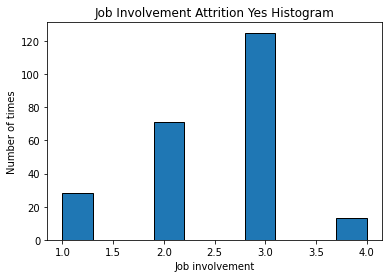

In [605]:
plt.hist(df_attrition_yes['JobInvolvement'], edgecolor='Black')
plt.title('Job Involvement Attrition Yes Histogram')
plt.xlabel('Job involvement')
plt.ylabel('Number of times')

In [606]:
df_attrition_yes['JobInvolvement'].mode()

0    3
Name: JobInvolvement, dtype: int64

Text(0, 0.5, 'Number of times')

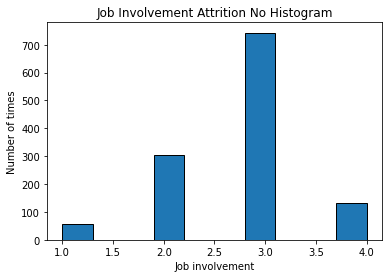

In [607]:
plt.hist(df_attrition_no['JobInvolvement'], edgecolor='Black')
plt.title('Job Involvement Attrition No Histogram')
plt.xlabel('Job involvement')
plt.ylabel('Number of times')

In [608]:
df_attrition_yes['JobInvolvement'].mode()

0    3
Name: JobInvolvement, dtype: int64

Tidak ada perbedaan job involvement antara attrition (yes/no).

###Job Level

Text(0, 0.5, 'Number of times')

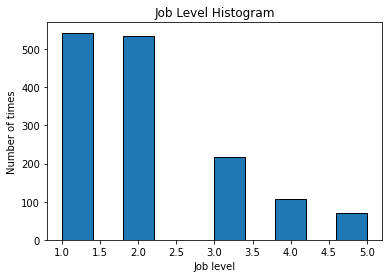

In [609]:
plt.hist(df['JobLevel'], edgecolor='Black')
plt.title('Job Level Histogram')
plt.xlabel('Job level')
plt.ylabel('Number of times')

In [610]:
df['JobLevel'].mode()

0    1
Name: JobLevel, dtype: int64

Text(0, 0.5, 'Number of times')

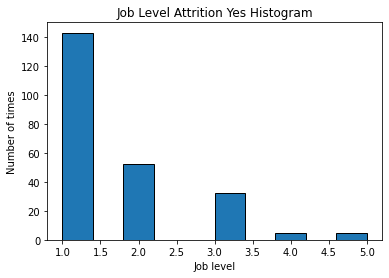

In [611]:
plt.hist(df_attrition_yes['JobLevel'], edgecolor='Black')
plt.title('Job Level Attrition Yes Histogram')
plt.xlabel('Job level')
plt.ylabel('Number of times')

In [612]:
df_attrition_yes['JobLevel'].mode()

0    1
Name: JobLevel, dtype: int64

Text(0, 0.5, 'Number of times')

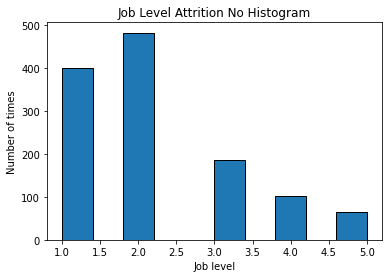

In [613]:
plt.hist(df_attrition_no['JobLevel'], edgecolor='Black')
plt.title('Job Level Attrition No Histogram')
plt.xlabel('Job level')
plt.ylabel('Number of times')

In [614]:
df_attrition_no['JobLevel'].mode()

0    2
Name: JobLevel, dtype: int64

Terdapat perbedaan antara karyawan yang mengalami attrition (yes) memiliki mode job level 1. Dan attrition (no) memiliki mode job level 2.

###Job Satisfaction

Text(0, 0.5, 'Number of times')

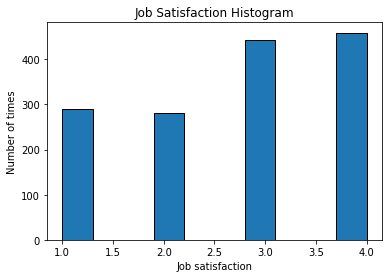

In [615]:
plt.hist(df['JobSatisfaction'], edgecolor='Black')
plt.title('Job Satisfaction Histogram')
plt.xlabel('Job satisfaction')
plt.ylabel('Number of times')

In [616]:
df['JobSatisfaction'].mode()

0    4
Name: JobSatisfaction, dtype: int64

Text(0, 0.5, 'Number of times')

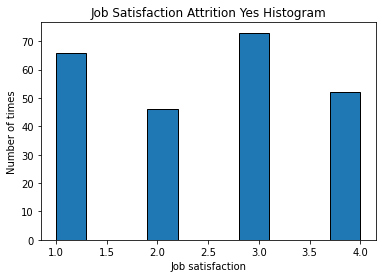

In [617]:
plt.hist(df_attrition_yes['JobSatisfaction'], edgecolor='Black')
plt.title('Job Satisfaction Attrition Yes Histogram')
plt.xlabel('Job satisfaction')
plt.ylabel('Number of times')

In [618]:
df_attrition_yes['JobSatisfaction'].mode()

0    3
Name: JobSatisfaction, dtype: int64

Text(0, 0.5, 'Number of times')

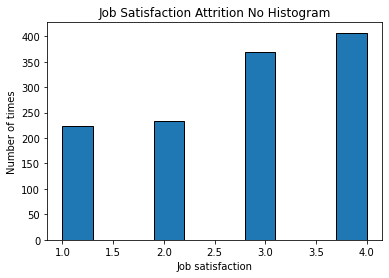

In [619]:
plt.hist(df_attrition_no['JobSatisfaction'], edgecolor='Black')
plt.title('Job Satisfaction Attrition No Histogram')
plt.xlabel('Job satisfaction')
plt.ylabel('Number of times')

In [620]:
df_attrition_no['JobSatisfaction'].mode()

0    4
Name: JobSatisfaction, dtype: int64

###Monthly Income

Text(0, 0.5, 'Number of times')

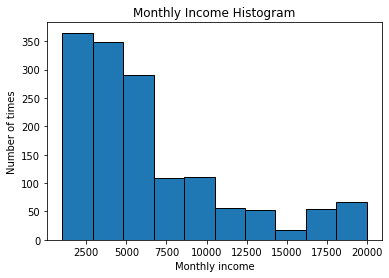

In [621]:
plt.hist(df['MonthlyIncome'], edgecolor='Black')
plt.title('Monthly Income Histogram')
plt.xlabel('Monthly income')
plt.ylabel('Number of times')

In [622]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

Rata-rata monthly income adalah 6502.

Monthy income distribusi mengalami skewness (positive).

Text(0, 0.5, 'Number of times')

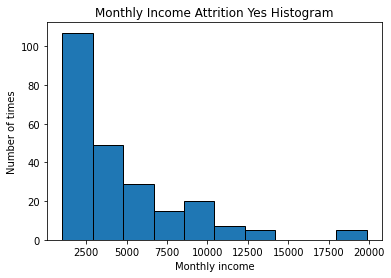

In [623]:
plt.hist(df_attrition_yes['MonthlyIncome'], edgecolor='Black')
plt.title('Monthly Income Attrition Yes Histogram')
plt.xlabel('Monthly income')
plt.ylabel('Number of times')

In [624]:
df_attrition_yes['MonthlyIncome'].describe()

count      237.000000
mean      4787.092827
std       3640.210367
min       1009.000000
25%       2373.000000
50%       3202.000000
75%       5916.000000
max      19859.000000
Name: MonthlyIncome, dtype: float64

Text(0, 0.5, 'Number of times')

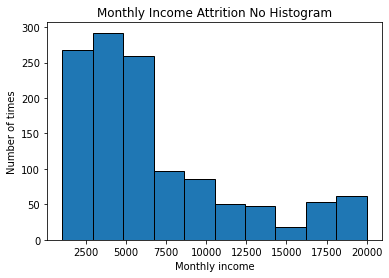

In [625]:
plt.hist(df_attrition_no['MonthlyIncome'], edgecolor='Black')
plt.title('Monthly Income Attrition No Histogram')
plt.xlabel('Monthly income')
plt.ylabel('Number of times')

In [626]:
df_attrition_no['MonthlyIncome'].describe()

count     1233.000000
mean      6832.739659
std       4818.208001
min       1051.000000
25%       3211.000000
50%       5204.000000
75%       8834.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

Monthly income yang mengalami attrition (yes) memiliki nilai rata-rata 4787. Dan attrition (no) memiliki nilai rata-rata 6832.

Perusahaan dapat memasukan monthly income untuk salah satu pertimbangan mengurangi attrition.

###Monthly Rate

Text(0, 0.5, 'Number of times')

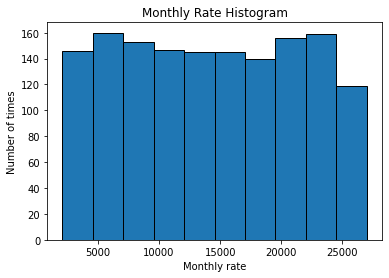

In [627]:
plt.hist(df['MonthlyRate'], edgecolor='Black')
plt.title('Monthly Rate Histogram')
plt.xlabel('Monthly rate')
plt.ylabel('Number of times')

In [628]:
df['MonthlyRate'].describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

Text(0, 0.5, 'Number of times')

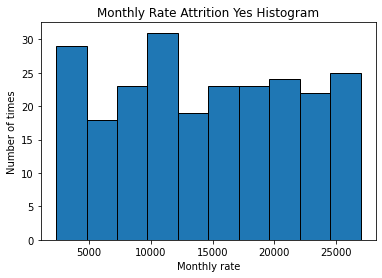

In [629]:
plt.hist(df_attrition_yes['MonthlyRate'], edgecolor='Black')
plt.title('Monthly Rate Attrition Yes Histogram')
plt.xlabel('Monthly rate')
plt.ylabel('Number of times')

In [630]:
df_attrition_yes['MonthlyRate'].describe()

count      237.000000
mean     14559.308017
std       7208.153264
min       2326.000000
25%       8870.000000
50%      14618.000000
75%      21081.000000
max      26999.000000
Name: MonthlyRate, dtype: float64

Text(0, 0.5, 'Number of times')

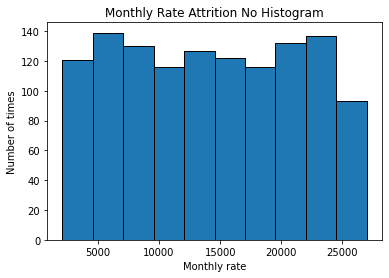

In [631]:
plt.hist(df_attrition_no['MonthlyRate'], edgecolor='Black')
plt.title('Monthly Rate Attrition No Histogram')
plt.xlabel('Monthly rate')
plt.ylabel('Number of times')

In [632]:
df_attrition_no['MonthlyRate'].describe()

count     1233.000000
mean     14265.779400
std       7102.260749
min       2094.000000
25%       7973.000000
50%      14120.000000
75%      20364.000000
max      26997.000000
Name: MonthlyRate, dtype: float64

Tidak ada terlalu perbedaan antara attrition (yes/no) untuk monthly rate.

###Number Companies Worked Before

Text(0, 0.5, 'Number of times')

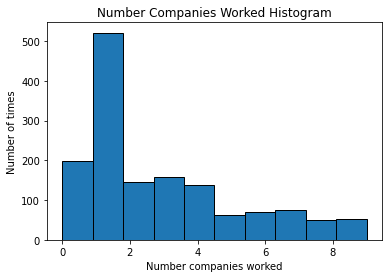

In [633]:
plt.hist(df['NumCompaniesWorked'], edgecolor='Black')
plt.title('Number Companies Worked Histogram')
plt.xlabel('Number companies worked')
plt.ylabel('Number of times')

In [634]:
df['NumCompaniesWorked'].mode()

0    1
Name: NumCompaniesWorked, dtype: int64

Text(0, 0.5, 'Number of times')

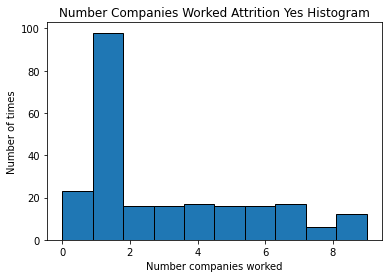

In [635]:
plt.hist(df_attrition_yes['NumCompaniesWorked'], edgecolor='Black')
plt.title('Number Companies Worked Attrition Yes Histogram')
plt.xlabel('Number companies worked')
plt.ylabel('Number of times')

In [636]:
df_attrition_yes['NumCompaniesWorked'].mode()

0    1
Name: NumCompaniesWorked, dtype: int64

Text(0, 0.5, 'Number of times')

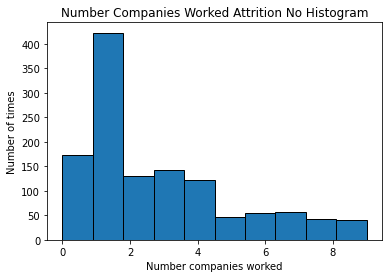

In [637]:
plt.hist(df_attrition_no['NumCompaniesWorked'], edgecolor='Black')
plt.title('Number Companies Worked Attrition No Histogram')
plt.xlabel('Number companies worked')
plt.ylabel('Number of times')

In [638]:
df_attrition_no['NumCompaniesWorked'].mode()

0    1
Name: NumCompaniesWorked, dtype: int64

Tidak ada perbedaan mode antara attrition (yes/no) terhadap jumlah perusahaan telah bekerja.

###Percent Salary Hike

Text(0, 0.5, 'Number of times')

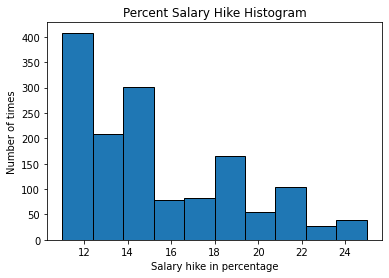

In [639]:
plt.hist(df['PercentSalaryHike'], edgecolor='Black')
plt.title('Percent Salary Hike Histogram')
plt.xlabel('Salary hike in percentage')
plt.ylabel('Number of times')

In [640]:
df['PercentSalaryHike'].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

Text(0, 0.5, 'Number of times')

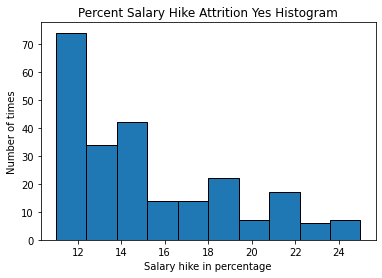

In [641]:
plt.hist(df_attrition_yes['PercentSalaryHike'], edgecolor='Black')
plt.title('Percent Salary Hike Attrition Yes Histogram')
plt.xlabel('Salary hike in percentage')
plt.ylabel('Number of times')

In [642]:
df_attrition_yes['PercentSalaryHike'].describe()

count    237.000000
mean      15.097046
std        3.770294
min       11.000000
25%       12.000000
50%       14.000000
75%       17.000000
max       25.000000
Name: PercentSalaryHike, dtype: float64

Text(0, 0.5, 'Number of times')

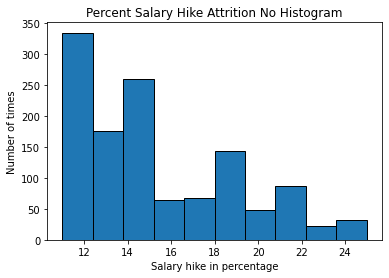

In [643]:
plt.hist(df_attrition_no['PercentSalaryHike'], edgecolor='Black')
plt.title('Percent Salary Hike Attrition No Histogram')
plt.xlabel('Salary hike in percentage')
plt.ylabel('Number of times')

In [644]:
df_attrition_no['PercentSalaryHike'].describe()

count    1233.000000
mean       15.231144
std         3.639511
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

Tidak terlihat perbedaan attrition (yes/no) terbadap peningkatan gaji persen.

###Performance Rating

Text(0, 0.5, 'Number of times')

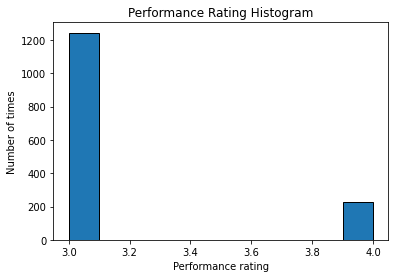

In [645]:
plt.hist(df['PerformanceRating'], edgecolor='Black')
plt.title('Performance Rating Histogram')
plt.xlabel('Performance rating')
plt.ylabel('Number of times')

In [646]:
df['PerformanceRating'].mode()

0    3
Name: PerformanceRating, dtype: int64

Text(0, 0.5, 'Number of times')

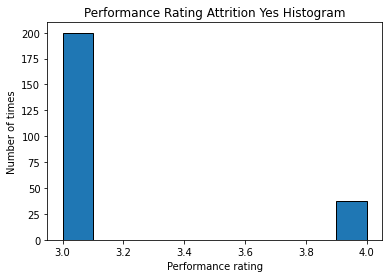

In [647]:
plt.hist(df_attrition_yes['PerformanceRating'], edgecolor='Black')
plt.title('Performance Rating Attrition Yes Histogram')
plt.xlabel('Performance rating')
plt.ylabel('Number of times')

In [648]:
df_attrition_yes['PerformanceRating'].mode()

0    3
Name: PerformanceRating, dtype: int64

Text(0, 0.5, 'Number of times')

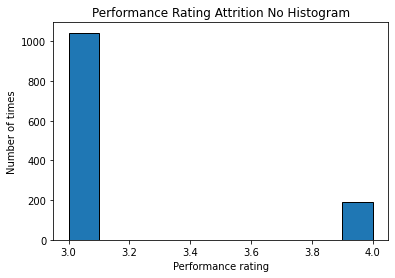

In [649]:
plt.hist(df_attrition_no['PerformanceRating'], edgecolor='Black')
plt.title('Performance Rating Attrition No Histogram')
plt.xlabel('Performance rating')
plt.ylabel('Number of times')

In [650]:
df_attrition_no['PerformanceRating'].mode()

0    3
Name: PerformanceRating, dtype: int64

###Relationship Satisfaction

Text(0, 0.5, 'Number of times')

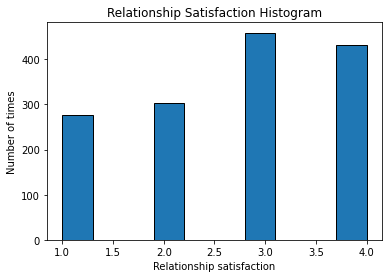

In [651]:
plt.hist(df['RelationshipSatisfaction'], edgecolor='Black')
plt.title('Relationship Satisfaction Histogram')
plt.xlabel('Relationship satisfaction')
plt.ylabel('Number of times')

In [652]:
df['RelationshipSatisfaction'].mode()

0    3
Name: RelationshipSatisfaction, dtype: int64

Text(0, 0.5, 'Number of times')

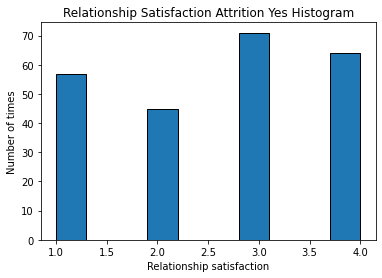

In [653]:
plt.hist(df_attrition_yes['RelationshipSatisfaction'], edgecolor='Black')
plt.title('Relationship Satisfaction Attrition Yes Histogram')
plt.xlabel('Relationship satisfaction')
plt.ylabel('Number of times')

In [654]:
df_attrition_yes['RelationshipSatisfaction'].mode()

0    3
Name: RelationshipSatisfaction, dtype: int64

Text(0, 0.5, 'Number of times')

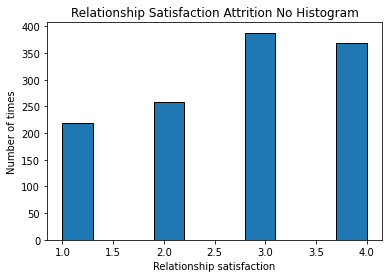

In [655]:
plt.hist(df_attrition_no['RelationshipSatisfaction'], edgecolor='Black')
plt.title('Relationship Satisfaction Attrition No Histogram')
plt.xlabel('Relationship satisfaction')
plt.ylabel('Number of times')

In [656]:
df_attrition_no['RelationshipSatisfaction'].mode()

0    3
Name: RelationshipSatisfaction, dtype: int64

###Stock Option Level

Text(0, 0.5, 'Number of times')

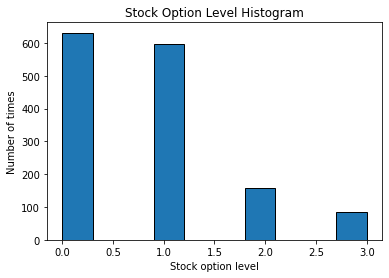

In [657]:
plt.hist(df['StockOptionLevel'], edgecolor='Black')
plt.title('Stock Option Level Histogram')
plt.xlabel('Stock option level')
plt.ylabel('Number of times')

In [658]:
df['StockOptionLevel'].mode()

0    0
Name: StockOptionLevel, dtype: int64

Text(0, 0.5, 'Number of times')

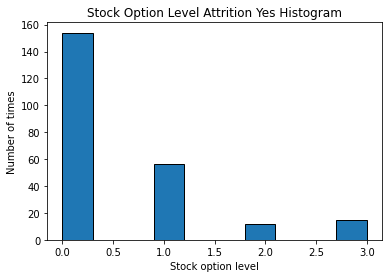

In [659]:
plt.hist(df_attrition_yes['StockOptionLevel'], edgecolor='Black')
plt.title('Stock Option Level Attrition Yes Histogram')
plt.xlabel('Stock option level')
plt.ylabel('Number of times')

In [660]:
df_attrition_yes['StockOptionLevel'].mode()

0    0
Name: StockOptionLevel, dtype: int64

Text(0, 0.5, 'Number of times')

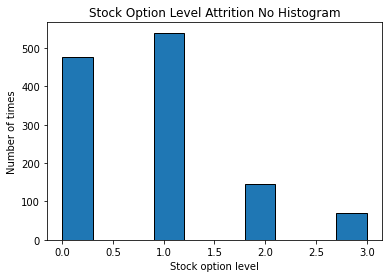

In [661]:
plt.hist(df_attrition_no['StockOptionLevel'], edgecolor='Black')
plt.title('Stock Option Level Attrition No Histogram')
plt.xlabel('Stock option level')
plt.ylabel('Number of times')

In [662]:
df_attrition_no['StockOptionLevel'].mode()

0    1
Name: StockOptionLevel, dtype: int64

Terdapat perbedaan antara attrition (yes/no) stock option level. Attrition (yes) memiliki mode 0 (tidak diberikan opsi membeli saham), sedangkan attrition (no) memiliki mode 1 (diberikan opsi saham).

###Total Working Years

Text(0, 0.5, 'Number of times')

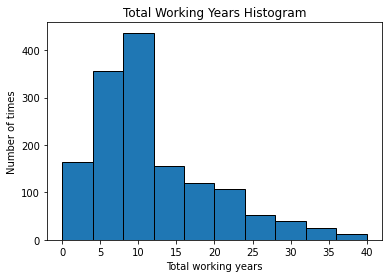

In [663]:
plt.hist(df['TotalWorkingYears'], edgecolor='Black')
plt.title('Total Working Years Histogram')
plt.xlabel('Total working years')
plt.ylabel('Number of times')

In [664]:
df['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

Text(0, 0.5, 'Number of times')

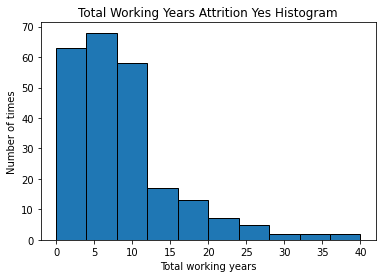

In [665]:
plt.hist(df_attrition_yes['TotalWorkingYears'], edgecolor='Black')
plt.title('Total Working Years Attrition Yes Histogram')
plt.xlabel('Total working years')
plt.ylabel('Number of times')

In [666]:
df_attrition_yes['TotalWorkingYears'].describe()

count    237.000000
mean       8.244726
std        7.169204
min        0.000000
25%        3.000000
50%        7.000000
75%       10.000000
max       40.000000
Name: TotalWorkingYears, dtype: float64

Text(0, 0.5, 'Number of times')

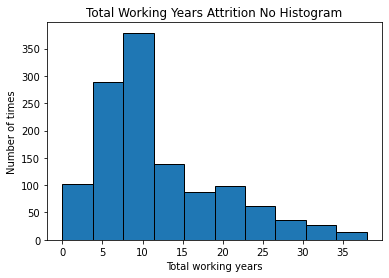

In [667]:
plt.hist(df_attrition_no['TotalWorkingYears'], edgecolor='Black')
plt.title('Total Working Years Attrition No Histogram')
plt.xlabel('Total working years')
plt.ylabel('Number of times')

In [668]:
df_attrition_no['TotalWorkingYears'].describe()

count    1233.000000
mean       11.862936
std         7.760719
min         0.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        38.000000
Name: TotalWorkingYears, dtype: float64

###Training Times Last Year

Text(0, 0.5, 'Number of times')

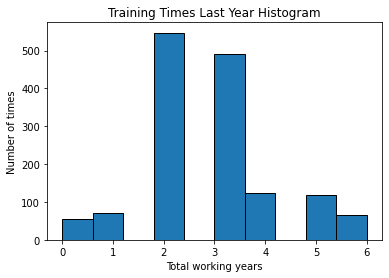

In [669]:
plt.hist(df['TrainingTimesLastYear'], edgecolor='Black')
plt.title('Training Times Last Year Histogram')
plt.xlabel('Total working years')
plt.ylabel('Number of times')

In [670]:
df['TrainingTimesLastYear'].mode()

0    2
Name: TrainingTimesLastYear, dtype: int64

Text(0, 0.5, 'Number of times')

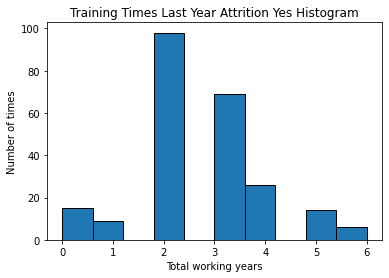

In [671]:
plt.hist(df_attrition_yes['TrainingTimesLastYear'], edgecolor='Black')
plt.title('Training Times Last Year Attrition Yes Histogram')
plt.xlabel('Total working years')
plt.ylabel('Number of times')

In [672]:
df_attrition_yes['TrainingTimesLastYear'].mode()

0    2
Name: TrainingTimesLastYear, dtype: int64

Text(0, 0.5, 'Number of times')

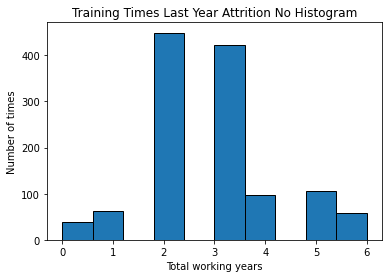

In [673]:
plt.hist(df_attrition_no['TrainingTimesLastYear'], edgecolor='Black')
plt.title('Training Times Last Year Attrition No Histogram')
plt.xlabel('Total working years')
plt.ylabel('Number of times')

In [674]:
df_attrition_no['TrainingTimesLastYear'].mode()

0    2
Name: TrainingTimesLastYear, dtype: int64

###Work Life Balance

Text(0, 0.5, 'Number of times')

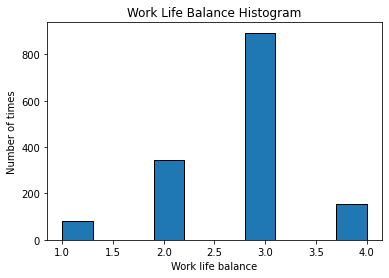

In [675]:
plt.hist(df['WorkLifeBalance'], edgecolor='Black')
plt.title('Work Life Balance Histogram')
plt.xlabel('Work life balance')
plt.ylabel('Number of times')

In [676]:
df['WorkLifeBalance'].mode()

0    3
Name: WorkLifeBalance, dtype: int64

Text(0, 0.5, 'Number of times')

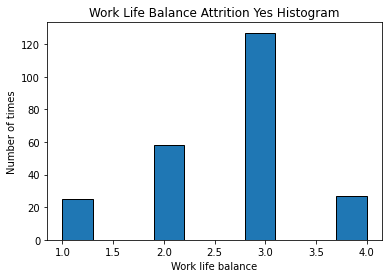

In [677]:
plt.hist(df_attrition_yes['WorkLifeBalance'], edgecolor='Black')
plt.title('Work Life Balance Attrition Yes Histogram')
plt.xlabel('Work life balance')
plt.ylabel('Number of times')

In [678]:
df_attrition_yes['WorkLifeBalance'].mode()

0    3
Name: WorkLifeBalance, dtype: int64

Text(0, 0.5, 'Number of times')

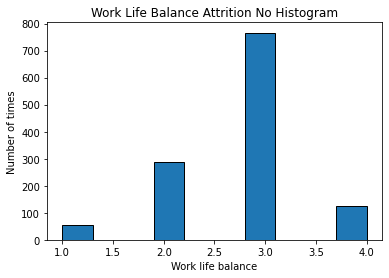

In [679]:
plt.hist(df_attrition_no['WorkLifeBalance'], edgecolor='Black')
plt.title('Work Life Balance Attrition No Histogram')
plt.xlabel('Work life balance')
plt.ylabel('Number of times')

In [680]:
df_attrition_no['WorkLifeBalance'].mode()

0    3
Name: WorkLifeBalance, dtype: int64

###Years At Company

Text(0, 0.5, 'Number of times')

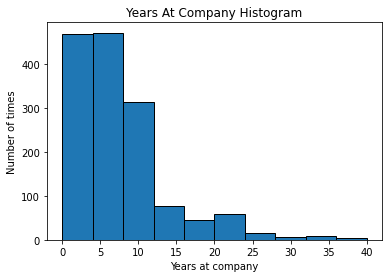

In [681]:
plt.hist(df['YearsAtCompany'], edgecolor='Black')
plt.title('Years At Company Histogram')
plt.xlabel('Years at company')
plt.ylabel('Number of times')

In [682]:
df['YearsAtCompany'].mode()

0    5
Name: YearsAtCompany, dtype: int64

Text(0, 0.5, 'Number of times')

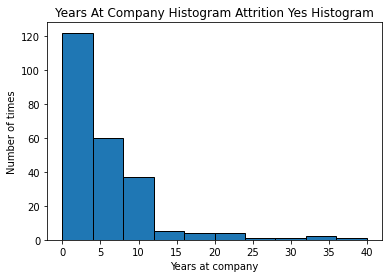

In [683]:
plt.hist(df_attrition_yes['YearsAtCompany'], edgecolor='Black')
plt.title('Years At Company Histogram Attrition Yes Histogram')
plt.xlabel('Years at company')
plt.ylabel('Number of times')

In [684]:
df_attrition_yes['YearsAtCompany'].mode()

0    1
Name: YearsAtCompany, dtype: int64

Text(0, 0.5, 'Number of times')

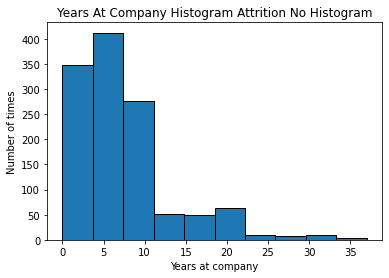

In [685]:
plt.hist(df_attrition_no['YearsAtCompany'], edgecolor='Black')
plt.title('Years At Company Histogram Attrition No Histogram')
plt.xlabel('Years at company')
plt.ylabel('Number of times')

In [686]:
df_attrition_no['YearsAtCompany'].mode()

0    5
Name: YearsAtCompany, dtype: int64

###Years In Current Role

Text(0, 0.5, 'Number of times')

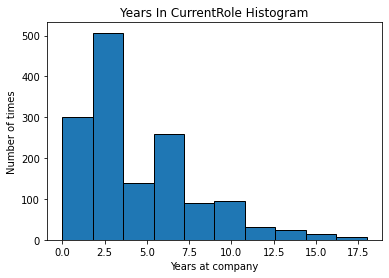

In [687]:
plt.hist(df['YearsInCurrentRole'], edgecolor='Black')
plt.title('Years In CurrentRole Histogram')
plt.xlabel('Years at company')
plt.ylabel('Number of times')

In [688]:
df['YearsAtCompany'].mode()

0    5
Name: YearsAtCompany, dtype: int64

Text(0, 0.5, 'Number of times')

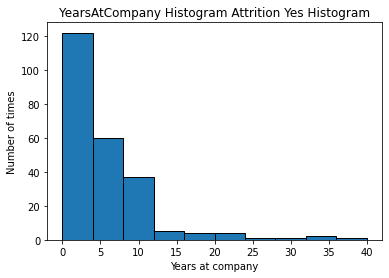

In [689]:
plt.hist(df_attrition_yes['YearsAtCompany'], edgecolor='Black')
plt.title('YearsAtCompany Histogram Attrition Yes Histogram')
plt.xlabel('Years at company')
plt.ylabel('Number of times')

In [690]:
df_attrition_yes['YearsAtCompany'].mode()

0    1
Name: YearsAtCompany, dtype: int64

Text(0, 0.5, 'Number of times')

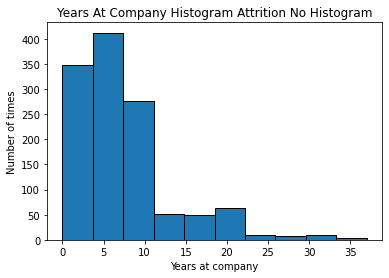

In [691]:
plt.hist(df_attrition_no['YearsAtCompany'], edgecolor='Black')
plt.title('Years At Company Histogram Attrition No Histogram')
plt.xlabel('Years at company')
plt.ylabel('Number of times')

In [692]:
df_attrition_no['YearsAtCompany'].mode()

0    5
Name: YearsAtCompany, dtype: int64

###Years Since Last Promotion

Text(0, 0.5, 'Number of times')

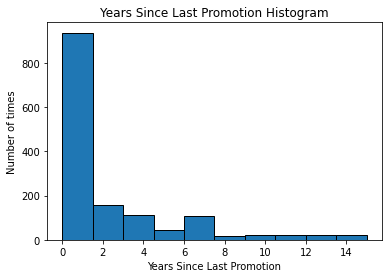

In [693]:
plt.hist(df['YearsSinceLastPromotion'], edgecolor='Black')
plt.title('Years Since Last Promotion Histogram')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Number of times')

In [694]:
df['YearsSinceLastPromotion'].mode()

0    0
Name: YearsSinceLastPromotion, dtype: int64

Text(0, 0.5, 'Number of times')

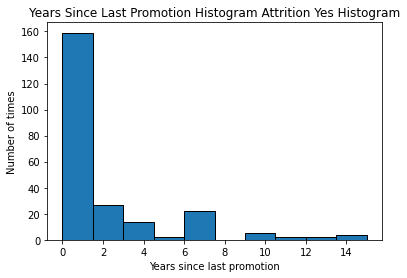

In [695]:
plt.hist(df_attrition_yes['YearsSinceLastPromotion'], edgecolor='Black')
plt.title('Years Since Last Promotion Histogram Attrition Yes Histogram')
plt.xlabel('Years since last promotion')
plt.ylabel('Number of times')

In [696]:
df_attrition_yes['YearsSinceLastPromotion'].mode()

0    0
Name: YearsSinceLastPromotion, dtype: int64

Text(0, 0.5, 'Number of times')

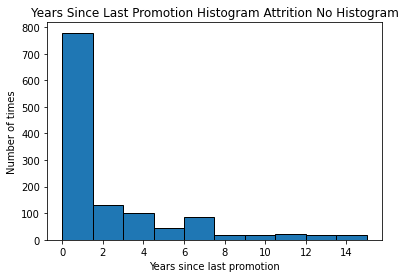

In [697]:
plt.hist(df_attrition_no['YearsSinceLastPromotion'], edgecolor='Black')
plt.title('Years Since Last Promotion Histogram Attrition No Histogram')
plt.xlabel('Years since last promotion')
plt.ylabel('Number of times')

In [698]:
df_attrition_yes['YearsSinceLastPromotion'].mode()

0    0
Name: YearsSinceLastPromotion, dtype: int64

###Years With Current Manager

Text(0, 0.5, 'Number of times')

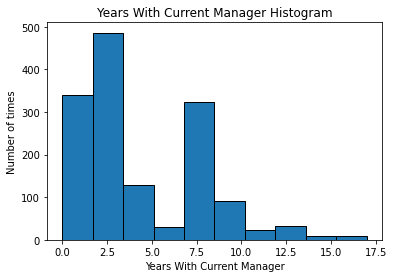

In [699]:
plt.hist(df['YearsWithCurrManager'], edgecolor='Black')
plt.title('Years With Current Manager Histogram')
plt.xlabel('Years With Current Manager')
plt.ylabel('Number of times')

In [700]:
df['YearsWithCurrManager'].mode()

0    2
Name: YearsWithCurrManager, dtype: int64

Text(0, 0.5, 'Number of times')

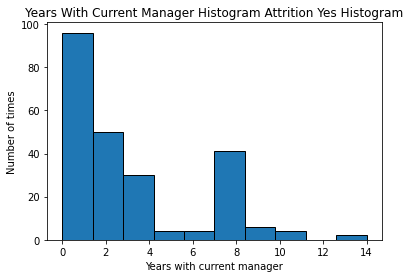

In [701]:
plt.hist(df_attrition_yes['YearsWithCurrManager'], edgecolor='Black')
plt.title('Years With Current Manager Histogram Attrition Yes Histogram')
plt.xlabel('Years with current manager')
plt.ylabel('Number of times')

In [702]:
df_attrition_yes['YearsWithCurrManager'].mode()

0    0
Name: YearsWithCurrManager, dtype: int64

Text(0, 0.5, 'Number of times')

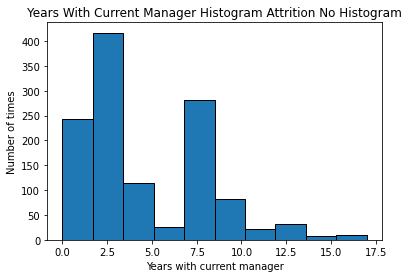

In [703]:
plt.hist(df_attrition_no['YearsWithCurrManager'], edgecolor='Black')
plt.title('Years With Current Manager Histogram Attrition No Histogram')
plt.xlabel('Years with current manager')
plt.ylabel('Number of times')

In [704]:
df_attrition_no['YearsWithCurrManager'].mode()

0    2
Name: YearsWithCurrManager, dtype: int64

##Object

In [705]:
objects = ['object']
df_objects = df.select_dtypes(include=objects)
df_objects

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [706]:
df_objects.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [707]:
df_objects.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


Karyawan yang mengalami attrition sekitar 16%.

Business travel untuk karyawan jarang.

Departemen terbanyak adalah R&D.

Pria adalah kelamin terbanyak.

Rata-rata karyawan sudah menikah.

#Analysis

##Logistic Regression

In [708]:
#Turning Attrition option into binary value
dfLR = df.copy()
dfLR['Attrition'] = dfLR['Attrition'].map({'Yes': 1, 'No': 0})
dfLR


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


###Correlation

In [709]:
dfLR.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


##Importing necessary library

In [710]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [711]:
#Splitting data for data training and training set. 80% for training, 20% for training test set
dfLR_Age = dfLR.copy(['Age','Attrition'])
x = dfLR_Age.iloc[:,0:1]
y = dfLR_Age.iloc[:,1:2]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)


In [712]:
y.ndim

2

###Age to Attrition

In [713]:
#Training Model
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [714]:
#Test Model
predictions = model.predict(x_test)
print(predictions)


print()


#check precision, recall, f1-score
print(classification_report(y_test, predictions))
print("accuracy: ", accuracy_score(y_test, predictions))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

accuracy:  0.8673469387755102


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [715]:
#model intercept
model.intercept_

array([0.12741942])

In [716]:
#model coefficient
model.coef_

array([[-0.04863948]])

###Daily Rate to Age

In [717]:
#Splitting data for data training and training set. 80% for training, 20% for training test set
#dfLR_DR = dfLR.copy(['Daily Rate','Attrition'])
#x = dfLR_DR.iloc[:,:4]
#y = dfLR_DR.iloc[:,1:2]
#x_traindr, x_testdr, y_traindr, y_testdr = train_test_split(x,y,test_size = 0.2, random_state=42)

#Training Model
#model = LogisticRegression()
#model.fit(x_traindr, y_traindr)

#Test Model
#predictiondr = model.predict(x_testdr)
#print(predictiondr)


#print()


#check precision, recall, f1-score
#print(classification_report(y_test, predictions))
#print("accuracy: ", accuracy_score(y_test, predictions))

###Distance from Home to Attrition

###Education to Attrition

##Clustering

###TEST

In [718]:
import numpy
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X))

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]
